## BACKGROUND AND PROBLEM STATEMENT
Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, users are able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.
One of our leading automobile clients having bike rental service wants to predict the number of the bikes demand on the hour basis using machine learning regression technique which increases the productivity and cost effectiveness, and able to manage the operations more efficiently. With these analysis they'll be able to track demand, supplies, managements, maintenance which can be utilized to work on strategy building part to compete with their market competitors.

### DATASET DESCRIPTION
- instant: record index
- date : date of the record
- season_type : season (1:winter, 2:spring, 3:summer, 4:fall)
- year : year (0: 2011, 1:2012) of the record
- month : month ( 1 to 12) of the record
- hour : hour (0 to 23) of the particular recorded date
- holiday_or_not : weather day is holiday or not (extracted from [Web Link])
- week_day : day of the week
- working_day : if day is neither weekend nor holiday is 1, otherwise is 0.
- weather_sit : 1: Clear, Few clouds, Partly cloudy, Partly cloudy 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temperature : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemperature: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- humidity: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casua_user: count of casual users
- registered_user: count of registered users
- count: count of total rental bikes including both casual and registered

## Data Exploration
- Understand the data and its distribution
- Identify the outliers
- Identify the missing values
- Identify the correlation between the variables
- Identify the variables which are highly correlated with the target variable
- data cleaning
- data transformation
- data visualization
- data preprocessing


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import MinMaxScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer

In [2]:
df = pd.read_csv('Dataset.csv')                      
bike_copy = df.copy()

### Elementary Data Analysis

In [3]:
bike_copy.head()

,Unnamed: 0,instant,date,season_type,year,month,hour,holiday_or_not,week_day,working_day,weather_sit,temperature,atemperature,humidity,windspeed,casual_user,registered_user,count
0,0,1,2011-01-01,1,0,1,0,0,6,0,1,0.26,0.31,0.89,0.0,5,15,20
1,1,2,2011-01-01,1,0,1,1,0,6,0,1,0.24,0.29,0.88,0.0,10,34,44
2,2,3,2011-01-01,1,0,1,2,0,6,0,1,0.24,0.29,0.88,0.0,7,29,36
3,3,4,2011-01-01,1,0,1,3,0,6,0,1,0.26,0.31,0.82,0.0,5,12,17
4,4,5,2011-01-01,1,0,1,4,0,6,0,1,0.26,0.31,0.82,0.0,2,3,5


In [4]:
bike_copy.describe()

,Unnamed: 0,instant,season_type,year,month,hour,holiday_or_not,week_day,working_day,weather_sit,temperature,atemperature,humidity,windspeed,casual_user,registered_user,count
count,17379.0000,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8689.0000,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.546502,0.513687,0.690051,0.203419,37.676218,155.786869,193.463088
std,5017.0295,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.211811,0.185381,0.211930,0.130912,49.305030,151.357286,181.387599
min,0.0000,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,2.000000,2.000000,5.000000
25%,4344.5000,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.370000,0.360000,0.530000,0.111800,6.000000,36.000000,44.000000
50%,8689.0000,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.550000,0.520000,0.690000,0.207600,19.000000,117.000000,146.000000
75%,13033.5000,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.730000,0.670000,0.860000,0.271500,50.000000,222.000000,285.000000
max,17378.0000,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.100000,1.080000,1.100000,0.910200,369.000000,888.000000,981.000000


In [5]:
bike_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       17379 non-null  int64  
 1   instant          17379 non-null  int64  
 2   date             17379 non-null  object 
 3   season_type      17379 non-null  int64  
 4   year             17379 non-null  int64  
 5   month            17379 non-null  int64  
 6   hour             17379 non-null  int64  
 7   holiday_or_not   17379 non-null  int64  
 8   week_day         17379 non-null  int64  
 9   working_day      17379 non-null  int64  
 10  weather_sit      17379 non-null  int64  
 11  temperature      17379 non-null  float64
 12  atemperature     17379 non-null  float64
 13  humidity         17379 non-null  float64
 14  windspeed        17379 non-null  float64
 15  casual_user      17379 non-null  int64  
 16  registered_user  17379 non-null  int64  
 17  count       

In [6]:
bike_copy.isnull().sum()

Unnamed: 0         0
instant            0
date               0
season_type        0
year               0
month              0
hour               0
holiday_or_not     0
week_day           0
working_day        0
weather_sit        0
temperature        0
atemperature       0
humidity           0
windspeed          0
casual_user        0
registered_user    0
count              0
dtype: int64

### Dropping Duplicates

In [7]:
bike_copy.shape

(17379, 18)

In [8]:
bike_copy.drop_duplicates(inplace=True)

In [9]:
bike_copy.shape

(17379, 18)

### Mapping Categorical Variables with names

In [10]:
bike_copy['season_type'] = bike_copy.season_type.map({1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'})
bike_copy['year'] = bike_copy.year.map({0:'2011', 1:'2012'})
bike_copy['month'] = bike_copy.month.map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})
bike_copy['holiday_or_not'] = bike_copy.holiday_or_not.map({0:'No', 1:'Yes'})
bike_copy['week_day'] = bike_copy.week_day.map({1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'})
bike_copy['working_day'] = bike_copy.working_day.map({0:'No', 1:'Yes'})
bike_copy['weather_sit'] = bike_copy.weather_sit.map({1:'Clear, Few clouds, Partly cloudy, Partly cloudy', 2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', 4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})

bike_copy.head()

,Unnamed: 0,instant,date,season_type,year,month,hour,holiday_or_not,week_day,working_day,weather_sit,temperature,atemperature,humidity,windspeed,casual_user,registered_user,count
0,0,1,2011-01-01,Winter,2011,January,0,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.31,0.89,0.0,5,15,20
1,1,2,2011-01-01,Winter,2011,January,1,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.29,0.88,0.0,10,34,44
2,2,3,2011-01-01,Winter,2011,January,2,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.29,0.88,0.0,7,29,36
3,3,4,2011-01-01,Winter,2011,January,3,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.31,0.82,0.0,5,12,17
4,4,5,2011-01-01,Winter,2011,January,4,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.31,0.82,0.0,2,3,5


In [11]:
#dropping unnammed column
bike_copy.drop(['Unnamed: 0'], axis=1, inplace=True)
bike_copy.head()

,instant,date,season_type,year,month,hour,holiday_or_not,week_day,working_day,weather_sit,temperature,atemperature,humidity,windspeed,casual_user,registered_user,count
0,1,2011-01-01,Winter,2011,January,0,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.31,0.89,0.0,5,15,20
1,2,2011-01-01,Winter,2011,January,1,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.29,0.88,0.0,10,34,44
2,3,2011-01-01,Winter,2011,January,2,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.29,0.88,0.0,7,29,36
3,4,2011-01-01,Winter,2011,January,3,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.31,0.82,0.0,5,12,17
4,5,2011-01-01,Winter,2011,January,4,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.31,0.82,0.0,2,3,5


### Analysing Categorical Variables

In [13]:
bike_copy.head()

,instant,date,season_type,year,month,hour,holiday_or_not,week_day,working_day,weather_sit,temperature,atemperature,humidity,windspeed,casual_user,registered_user,count
0,1,2011-01-01,Winter,2011,January,0,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.31,0.89,0.0,5,15,20
1,2,2011-01-01,Winter,2011,January,1,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.29,0.88,0.0,10,34,44
2,3,2011-01-01,Winter,2011,January,2,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.29,0.88,0.0,7,29,36
3,4,2011-01-01,Winter,2011,January,3,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.31,0.82,0.0,5,12,17
4,5,2011-01-01,Winter,2011,January,4,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.31,0.82,0.0,2,3,5


### Analysing Numerical Variables

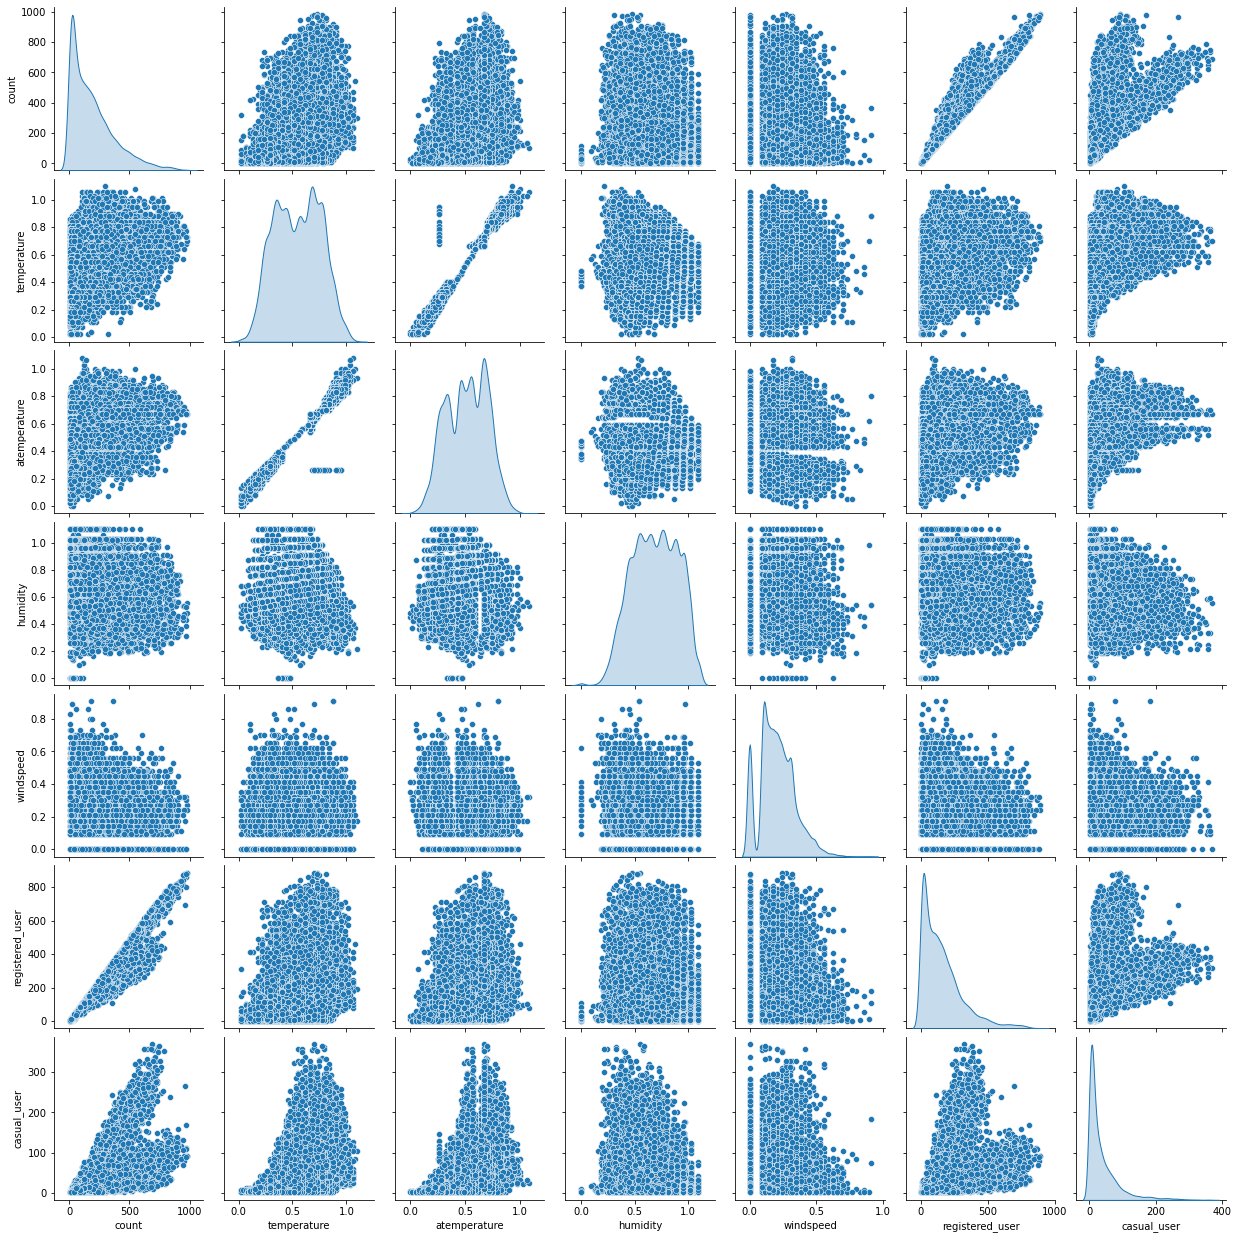

In [12]:
# Pairplot for numerical variables
sns.pairplot(df, vars=['count', 'temperature', 'atemperature', 'humidity', 'windspeed', 'registered_user', 'casual_user'], diag_kind='kde')
plt.show()

If we closely observe, Total count is influenced by `temperature` and `atemperature` and not by `humidity` and `windspeed`

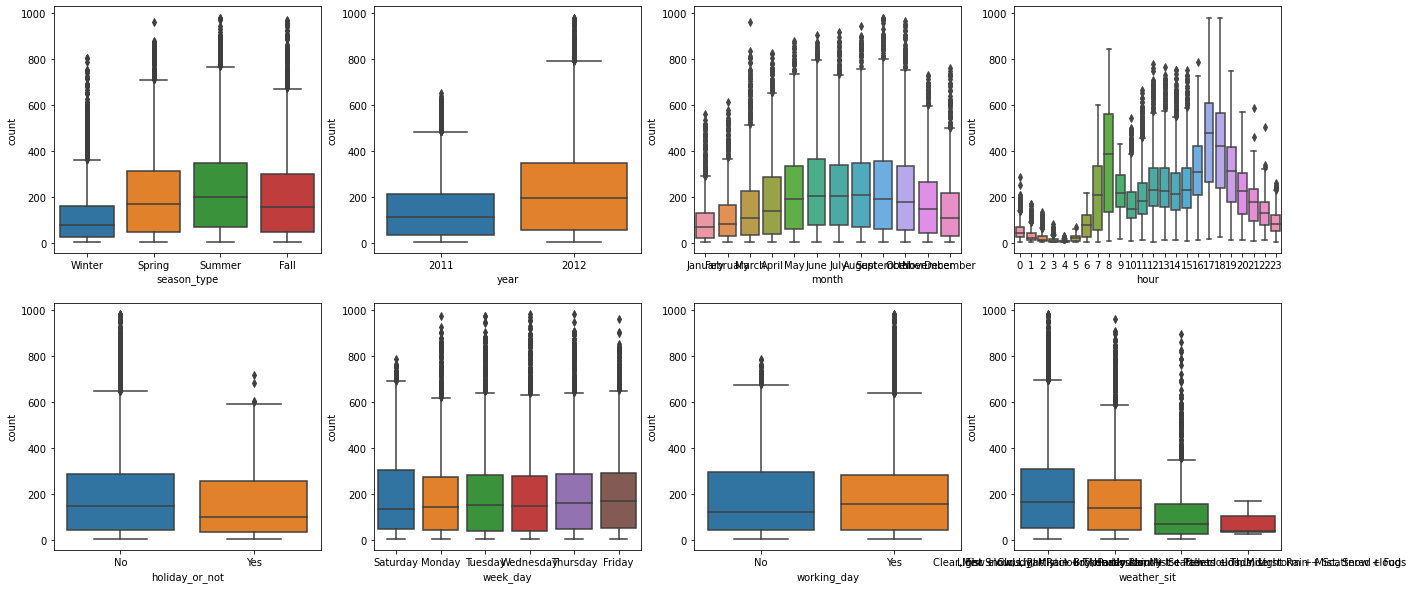

In [14]:
# Scatterplot for categorical variables
plt.figure(figsize=(22, 10))

plt.subplot(2, 4, 1)
sns.boxplot(x='season_type', y='count', data=bike_copy)

plt.subplot(2, 4, 2)
sns.boxplot(x='year', y='count', data=bike_copy)

plt.subplot(2, 4, 3)
sns.boxplot(x='month', y='count', data=bike_copy)

plt.subplot(2, 4, 4)
sns.boxplot(x='hour', y='count', data=bike_copy)

plt.subplot(2, 4, 5)
sns.boxplot(x='holiday_or_not', y='count', data=bike_copy)

plt.subplot(2, 4, 6)
sns.boxplot(x='week_day', y='count', data=bike_copy)

plt.subplot(2, 4, 7)
sns.boxplot(x='working_day', y='count', data=bike_copy)

plt.subplot(2, 4, 8)
sns.boxplot(x='weather_sit', y='count', data=bike_copy)


plt.show()

- More bikes are rented during Spring and Summer
- More bike rented in 2012
- Peaked during May to October
- Most bikes are rented during 8 am to 5 pm and then less bikes are rented
- A slight more bikes were rented on holidays
- week_day and working_day are highly correlated but not with count as same number of bikes are rented approximately on all days
- Most bikes are rented in clear weather

<AxesSubplot:xlabel='temperature', ylabel='Density'>

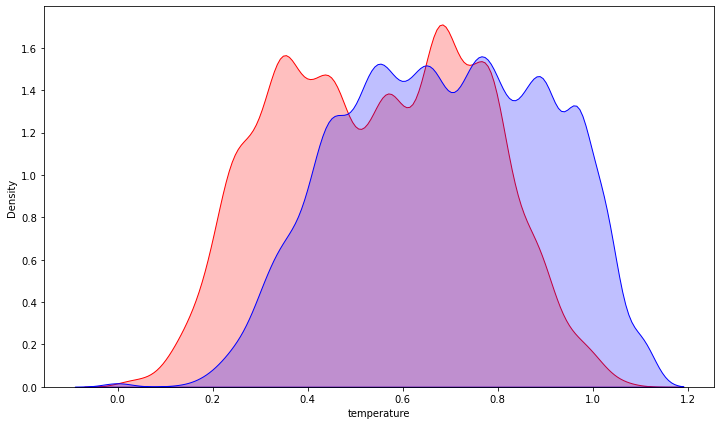

In [15]:
plt.figure(figsize=(12, 7))
sns.kdeplot(bike_copy['temperature'], fill=True, color='r')
sns.kdeplot(bike_copy['humidity'], fill=True, color='b')

<AxesSubplot:xlabel='season_type', ylabel='count'>

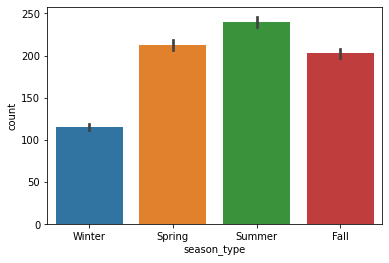

In [16]:
sns.barplot(x='season_type', y='count', data=bike_copy)

<AxesSubplot:xlabel='weather_sit', ylabel='count'>

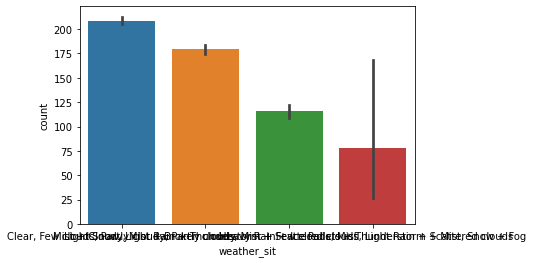

In [17]:
sns.barplot(x='weather_sit', y='count', data=bike_copy)

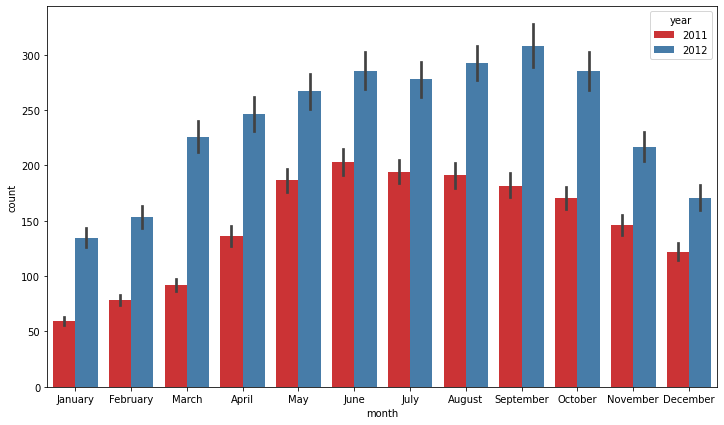

In [18]:
plt.figure(figsize=(12, 7))
sns.barplot(x='month', y='count', data=bike_copy, hue='year', palette='Set1')
plt.show()

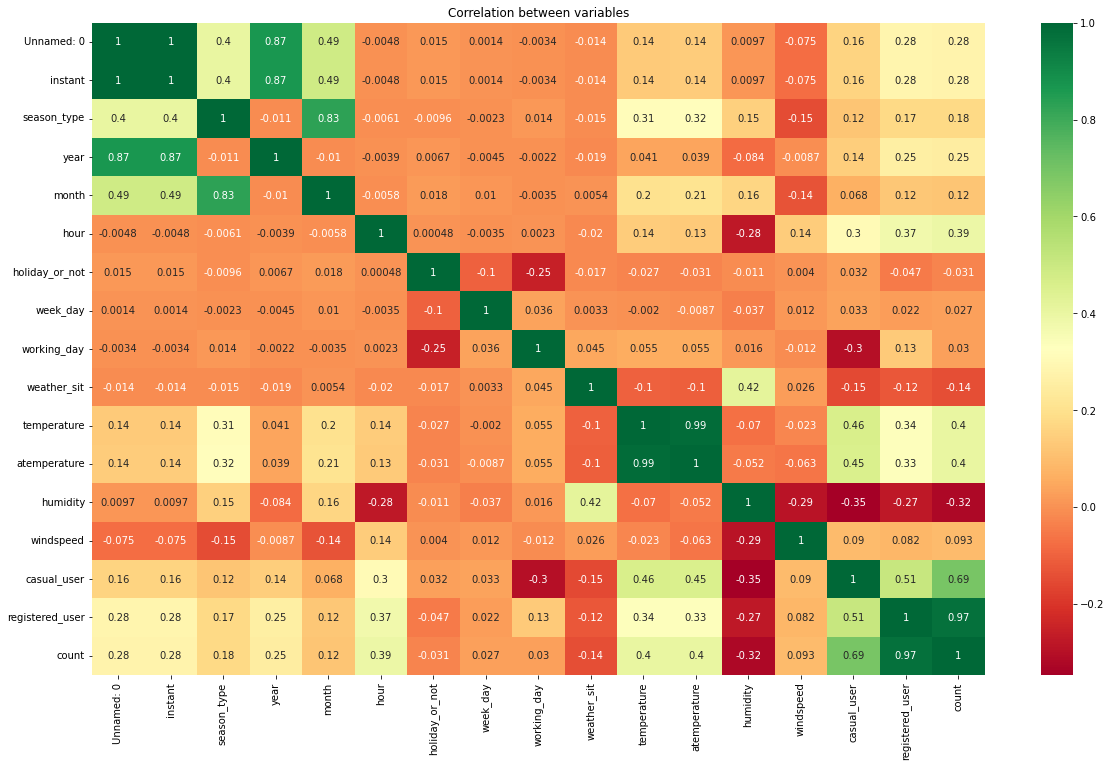

In [19]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.title('Correlation between variables')
plt.show()

## Model Building
- remove the variables which are not important for the model
- create dummy variables
- split the data into train and test
- rescaling data
- create a linear model
- Reccursive Feature Elimination
- Iteration of Model based on stats value

In [20]:
bike = bike_copy.copy()
bike.head()

,instant,date,season_type,year,month,hour,holiday_or_not,week_day,working_day,weather_sit,temperature,atemperature,humidity,windspeed,casual_user,registered_user,count
0,1,2011-01-01,Winter,2011,January,0,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.31,0.89,0.0,5,15,20
1,2,2011-01-01,Winter,2011,January,1,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.29,0.88,0.0,10,34,44
2,3,2011-01-01,Winter,2011,January,2,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.29,0.88,0.0,7,29,36
3,4,2011-01-01,Winter,2011,January,3,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.31,0.82,0.0,5,12,17
4,5,2011-01-01,Winter,2011,January,4,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.31,0.82,0.0,2,3,5


In [21]:
# Dropping unwanted variables - instant, date, casual_user, registered_user
bike.drop(['instant','date','casual_user','registered_user'], axis=1, inplace=True)
bike.head()

,season_type,year,month,hour,holiday_or_not,week_day,working_day,weather_sit,temperature,atemperature,humidity,windspeed,count
0,Winter,2011,January,0,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.31,0.89,0.0,20
1,Winter,2011,January,1,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.29,0.88,0.0,44
2,Winter,2011,January,2,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.29,0.88,0.0,36
3,Winter,2011,January,3,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.31,0.82,0.0,17
4,Winter,2011,January,4,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.31,0.82,0.0,5


In [22]:
# Creating dummy variables for categorical variables
season = pd.get_dummies(bike.season_type, drop_first=True)
years = pd.get_dummies(bike.year, drop_first=True)
months = pd.get_dummies(bike.month, drop_first=True)
hours = pd.get_dummies(bike.hour, drop_first=True)
holiday = pd.get_dummies(bike.holiday_or_not, drop_first=True)
weekdays = pd.get_dummies(bike.week_day, drop_first=True)
workingday = pd.get_dummies(bike.working_day, drop_first=True)
weather = pd.get_dummies(bike.weather_sit, drop_first=True)

bike = pd.concat([season, years, months, hours, holiday, weekdays, workingday, weather, bike], axis=1)
bike.head()

,Spring,Summer,Winter,2012,August,December,February,January,July,June,...,hour,holiday_or_not,week_day,working_day,weather_sit,temperature,atemperature,humidity,windspeed,count
0,0,0,1,0,0,0,0,1,0,0,...,0,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.31,0.89,0.0,20
1,0,0,1,0,0,0,0,1,0,0,...,1,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.29,0.88,0.0,44
2,0,0,1,0,0,0,0,1,0,0,...,2,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.29,0.88,0.0,36
3,0,0,1,0,0,0,0,1,0,0,...,3,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.31,0.82,0.0,17
4,0,0,1,0,0,0,0,1,0,0,...,4,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.31,0.82,0.0,5


In [23]:
bike.drop(['season_type','year','month','hour','holiday_or_not','week_day','working_day','weather_sit'], axis=1, inplace=True)
bike.head()

,Spring,Summer,Winter,2012,August,December,February,January,July,June,...,Wednesday,Yes,"Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog","Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",temperature,atemperature,humidity,windspeed,count
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0.26,0.31,0.89,0.0,20
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0.24,0.29,0.88,0.0,44
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0.24,0.29,0.88,0.0,36
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0.26,0.31,0.82,0.0,17
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0.26,0.31,0.82,0.0,5


In [24]:
bike.shape

(17379, 53)

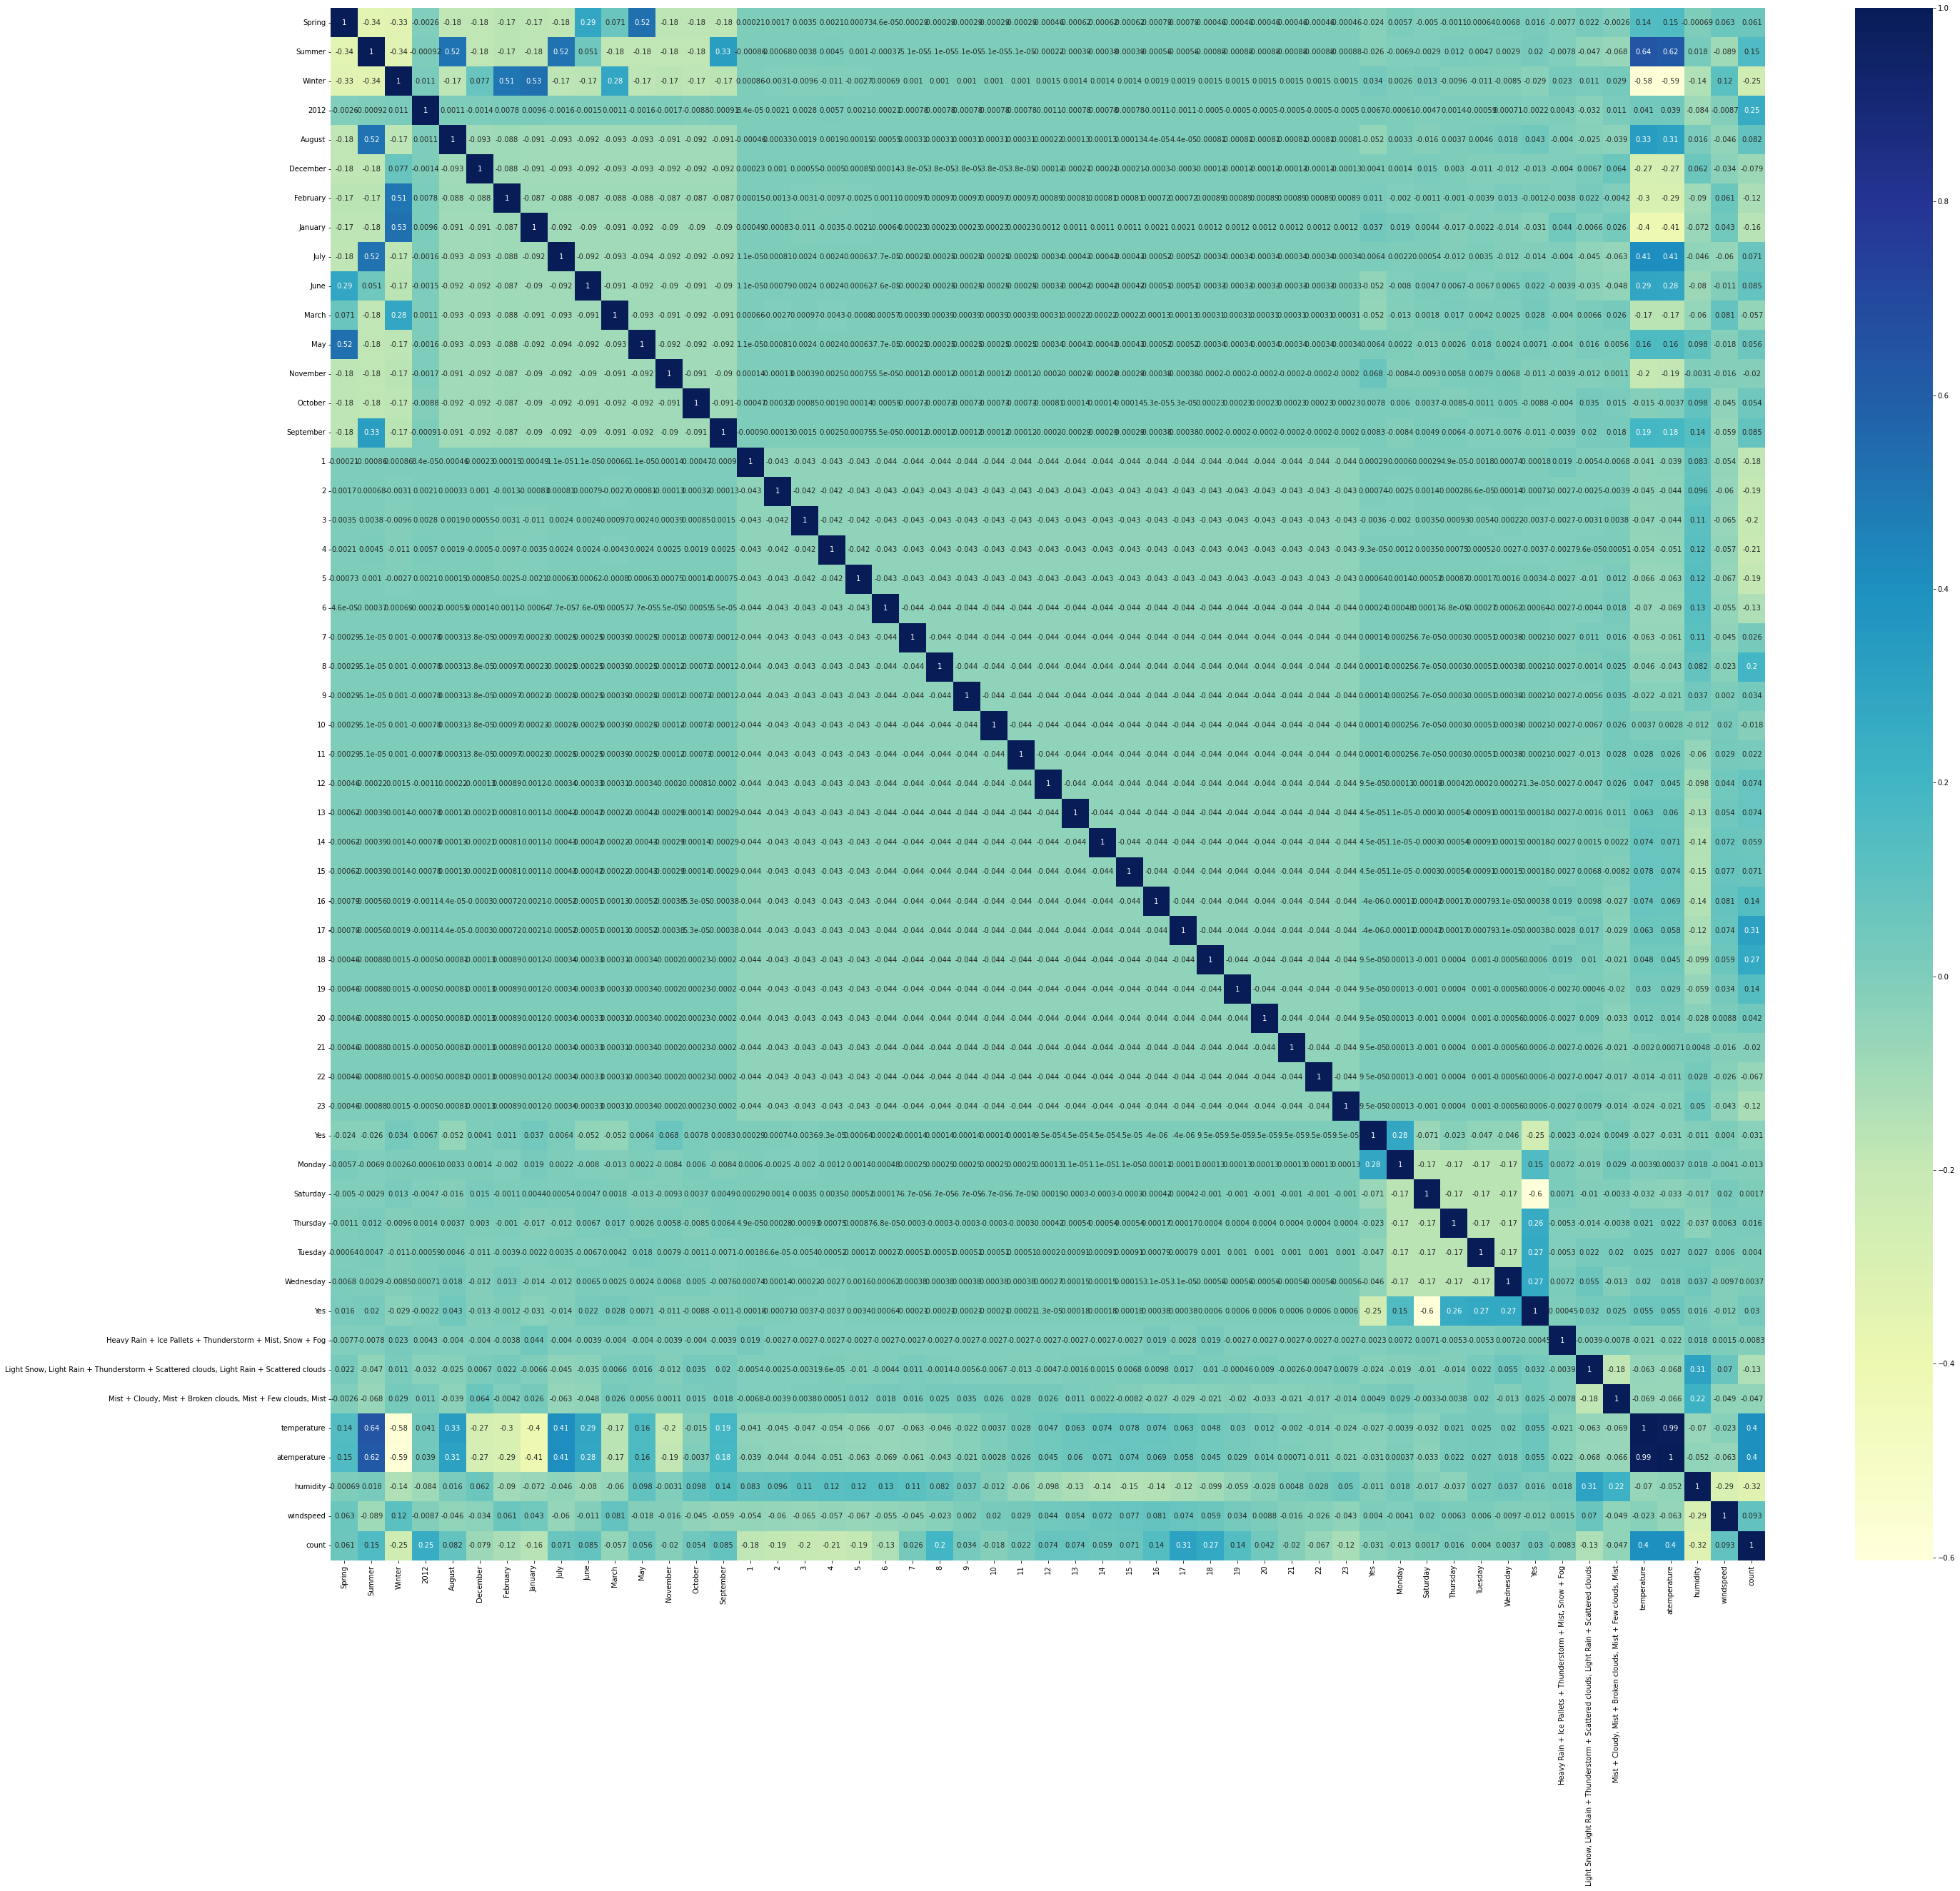

In [25]:
plt.figure(figsize=(45, 40))
sns.heatmap(bike.corr(), cmap='YlGnBu', annot = True)
plt.show()

In [26]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
bike_train, bike_test = train_test_split(bike,train_size=0.7,random_state= 100)

In [27]:
print(bike_train.shape)
print(bike_test.shape)

(12165, 53)
(5214, 53)


### Rescaling the data

In [28]:
# min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['temperature', 'atemperature', 'humidity', 'windspeed', 'count']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

c:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\frame.py:3699: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[iloc] = igetitem(value, i)


,Spring,Summer,Winter,2012,August,December,February,January,July,June,...,Wednesday,Yes,"Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog","Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",temperature,atemperature,humidity,windspeed,count
8364,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0.358491,0.367925,0.527273,0.122830,0.003074
643,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0.150943,0.235849,0.800000,0.000000,0.010246
9518,0,0,1,1,0,0,1,0,0,0,...,0,1,0,0,0,0.377358,0.405660,0.400000,0.263239,0.143443
7233,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.358491,0.367925,0.763636,0.105361,0.030738
7443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.330189,0.320755,0.390909,0.298286,0.212090


In [29]:
bike_train.describe()

,Spring,Summer,Winter,2012,August,December,February,January,July,June,...,Wednesday,Yes,"Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog","Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",temperature,atemperature,humidity,windspeed,count
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,...,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.254501,0.261241,0.239704,0.500781,0.086313,0.084176,0.076120,0.077764,0.087135,0.083683,...,0.140732,0.681134,0.000247,0.080723,0.263872,0.499008,0.486644,0.627676,0.222227,0.194161
std,0.435598,0.439329,0.426920,0.500020,0.280838,0.277663,0.265201,0.267811,0.282045,0.276923,...,0.347759,0.466056,0.015703,0.272421,0.440749,0.199667,0.174695,0.192936,0.142892,0.186013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.330189,0.339623,0.481818,0.122830,0.039959
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000,0.490566,0.627273,0.228082,0.145492
75%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.669811,0.632075,0.781818,0.298286,0.288934
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


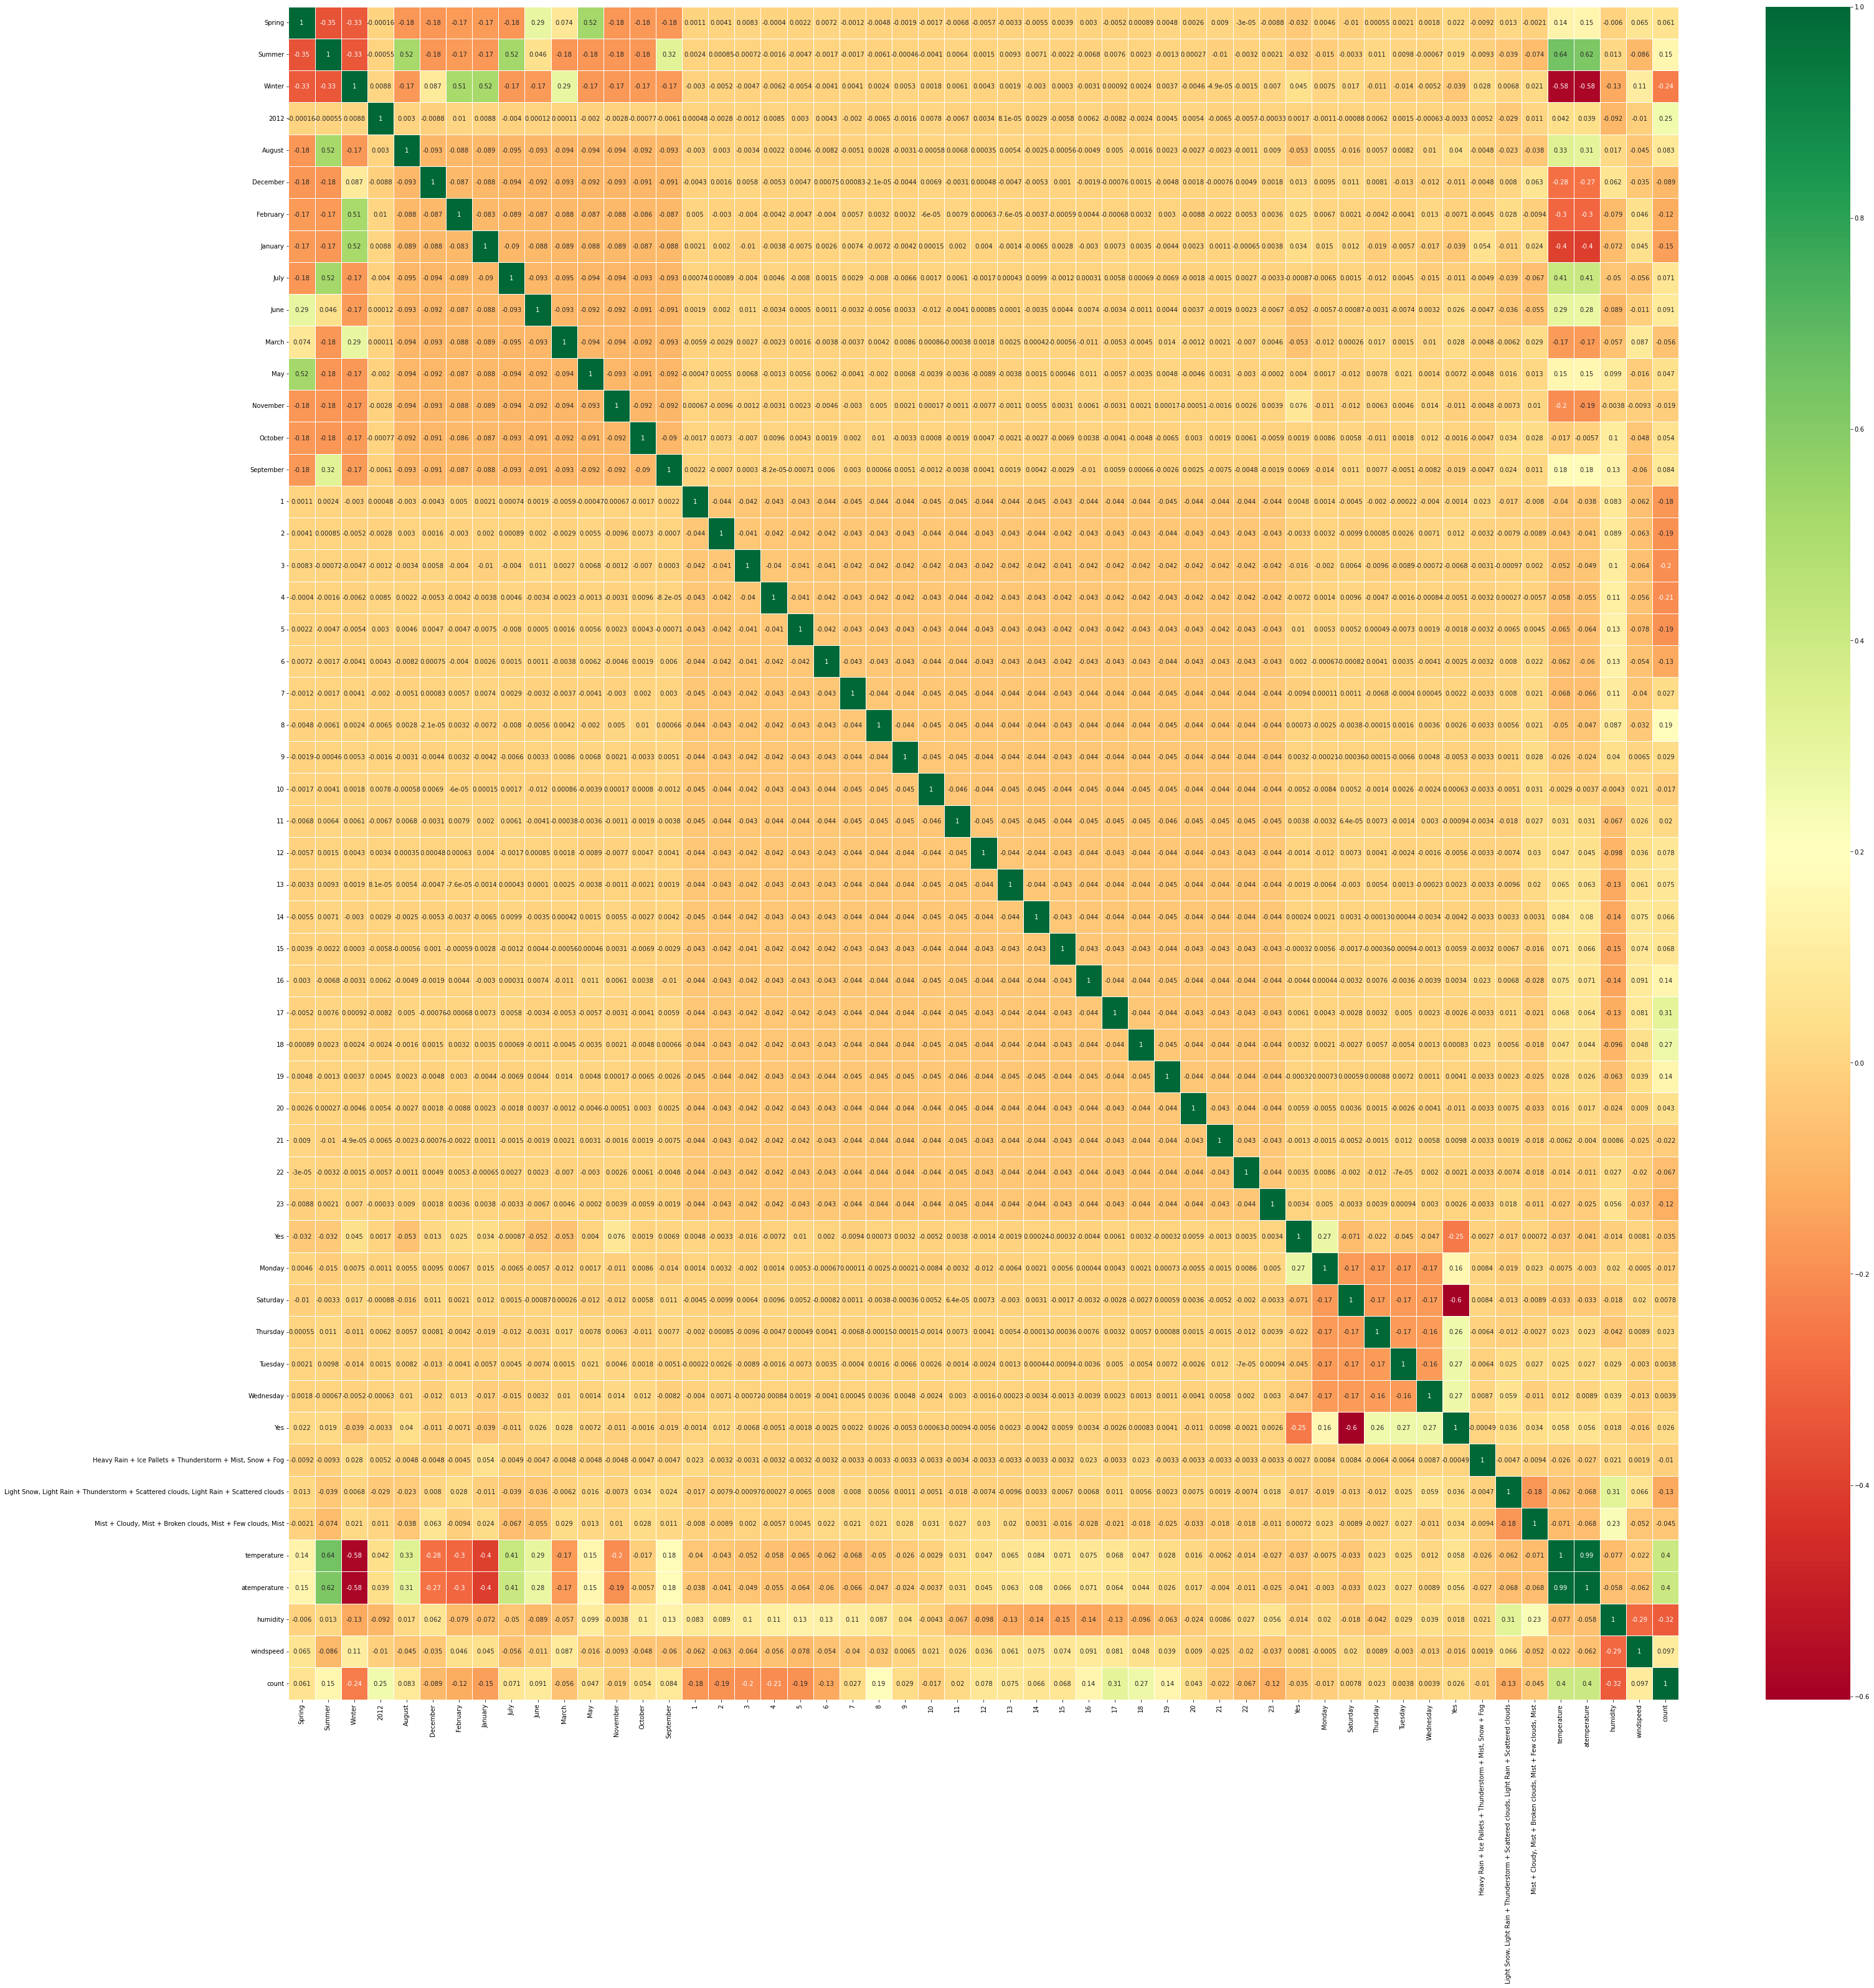

In [30]:
# heat map to check collinearity
plt.figure(figsize = (50,50))
ax= sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

- There is multi collinearity between variables
- There is temperature vs atemperature highly correlated
- Winter have negative correlation with count
- There is humidity vs windspeed highly correlated
- December, January, February have negative correlation with count
- Hours between 12 am to 6 am have negative correlation with count
- Hours between 5 pm to 7pm have positive correlation with count
- Humidity has negative corelation with count
- Temperature and atemperature have positive correlation with count

## Model Building

In [31]:
# Dividing into X and y sets for the model building
y_train = bike_train.pop('count')
X_train = bike_train

In [32]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

C:\Users\ASUS\AppData\Local\Temp/ipykernel_15084/3120027194.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - res), bins = 20)


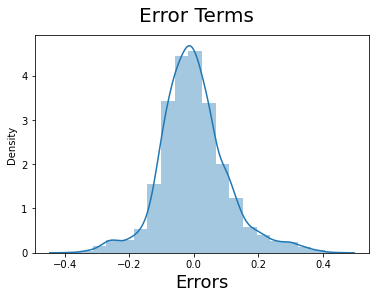

In [33]:
res = lm.predict(X_train)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()


In [34]:
num_vars = ['temperature', 'atemperature', 'humidity', 'windspeed', 'count']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

c:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\frame.py:3699: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[iloc] = igetitem(value, i)


,Spring,Summer,Winter,2012,August,December,February,January,July,June,...,Wednesday,Yes,"Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog","Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",temperature,atemperature,humidity,windspeed,count
6052,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0.726415,0.698113,0.618182,0.193034,0.599385
6250,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.622642,0.556604,0.936364,0.105361,0.052254
8110,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0.377358,0.405660,0.463636,0.333443,0.190574
7604,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.292453,0.311321,0.363636,0.157877,0.142418
6356,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0.641509,0.575472,0.936364,0.193034,0.123975


In [35]:
y_test=bike_test.pop("count")
X_test=bike_test

In [37]:
#Selecting the variables that were part of final model.
col1=X_train.columns

X_test=X_test[col1]

X_test


,Spring,Summer,Winter,2012,August,December,February,January,July,June,...,Wednesday,Yes,Yes,"Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog","Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",temperature,atemperature,humidity,windspeed
6052,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0.726415,0.698113,0.618182,0.193034
6250,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.622642,0.556604,0.936364,0.105361
8110,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0.377358,0.405660,0.463636,0.333443
7604,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0.292453,0.311321,0.363636,0.157877
6356,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0.641509,0.575472,0.936364,0.193034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.669811,0.613208,0.781818,0.157877
10237,0,0,1,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0.537736,0.528302,0.372727,0.526368
904,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0.103774,0.122642,0.500000,0.263239
11693,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0.518868,0.509434,0.772727,0.228082


In [40]:
print(X_test.shape)

import statsmodels.api as sm

X_test_lm1 = sm.add_constant(X_test)

X_test_lm1.info()


(5214, 54)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5214 entries, 6052 to 6700
Data columns (total 55 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   const                                                                                    5214 non-null   float64
 1   Spring                                                                                   5214 non-null   uint8  
 2   Summer                                                                                   5214 non-null   uint8  
 3   Winter                                                                                   5214 non-null   uint8  
 4   2012                                                                                     5214 non-null   uint8  
 5   August                                          

c:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Recurring Feature Elimination(RFE)** is a wrapper method which uses the model to identify the best features. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [44]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [45]:
# first model with all the variables
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

col = X_train.columns[rfe.support_]
col

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Index([7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 'atemperature'], dtype='object')

In [46]:

X_train.columns[~rfe.support_]

# Building model using statsmodel, for the detailed statistics
import statsmodels.api as sm
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     1006.
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:16:36   Log-Likelihood:                 8112.4
No. Observations:               12165   AIC:                        -1.619e+04
Df Residuals:                   12149   BIC:                        -1.607e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0883      0.003    -25.307   

c:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [50]:
lm = LinearRegression()

In [51]:
#running RFE with o/p number of variable equal to 15
rfe=RFE(lm,n_features_to_select=15) # running RFE
rfe=rfe.fit(X_train,y_train)

In [52]:
# see the list of variables 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Spring', False, 26),
 ('Summer', False, 22),
 ('Winter', False, 8),
 ('2012', False, 4),
 ('August', False, 34),
 ('December', False, 29),
 ('February', False, 38),
 ('January', False, 31),
 ('July', False, 12),
 ('June', False, 33),
 ('March', False, 27),
 ('May', False, 28),
 ('November', False, 30),
 ('October', False, 13),
 ('September', False, 15),
 (1, False, 21),
 (2, False, 19),
 (3, False, 18),
 (4, False, 17),
 (5, False, 20),
 (6, False, 10),
 (7, True, 1),
 (8, True, 1),
 (9, True, 1),
 (10, True, 1),
 (11, True, 1),
 (12, True, 1),
 (13, True, 1),
 (14, True, 1),
 (15, True, 1),
 (16, True, 1),
 (17, True, 1),
 (18, True, 1),
 (19, True, 1),
 (20, True, 1),
 (21, False, 2),
 (22, False, 5),
 (23, False, 9),
 ('Yes', False, 14),
 ('Monday', False, 32),
 ('Saturday', False, 24),
 ('Thursday', False, 36),
 ('Tuesday', False, 35),
 ('Wednesday', False, 37),
 ('Yes', False, 25),
 ('Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog', False, 3),
 ('Light Snow, Light R

In [53]:
#  RFE selected variabbles
col=X_train.columns[rfe.support_]
col

Index([7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 'atemperature'], dtype='object')

In [54]:
X_train.columns[~rfe.support_]


Index([                                                                                 'Spring',
                                                                                        'Summer',
                                                                                        'Winter',
                                                                                          '2012',
                                                                                        'August',
                                                                                      'December',
                                                                                      'February',
                                                                                       'January',
                                                                                          'July',
                                                                                          'June',
                    

### Building best model using stats

In [55]:
X_train_rfe=X_train[col]

In [56]:
# Function for VIF Calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 


## Model 1

The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression Higher VIF parameter means high multi colinearity. So the parameters whith High VIF can be removed

In [57]:
#calculate VIF in a df to analyse the data 
calculateVIF(X_train_rfe)

,Features,VIF
14,atemperature,2.35
6,13,1.11
7,14,1.11
9,16,1.11
10,17,1.11
4,11,1.10
5,12,1.10
8,15,1.10
11,18,1.10
12,19,1.10


In [58]:
import statsmodels.api as sm
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     1006.
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:17:18   Log-Likelihood:                 8112.4
No. Observations:               12165   AIC:                        -1.619e+04
Df Residuals:                   12149   BIC:                        -1.607e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0883      0.003    -25.307   

c:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Model Optimising Process


- For further model creation, we will remove the high p value variables and do some iterations to get optimum values.
- Since this is first model to learn about the stats and fundamentals, we will not use other Algorithms that automates the Parameter selections
- Either VIF or P value can be reduced based on your judgement.
- Here giving preference to statistical values, so P values is given importance first
- VIF is given importance next

In [61]:
X_train_new = X_train_lm1.drop(["const"], axis = 1)

In [62]:
calculateVIF(X_train_new)

,Features,VIF
14,atemperature,2.35
6,13,1.11
7,14,1.11
9,16,1.11
10,17,1.11
4,11,1.10
5,12,1.10
8,15,1.10
11,18,1.10
12,19,1.10


### Mid Way Analyis

- All high P values removed
- High VIF also removed
- checking for correlation


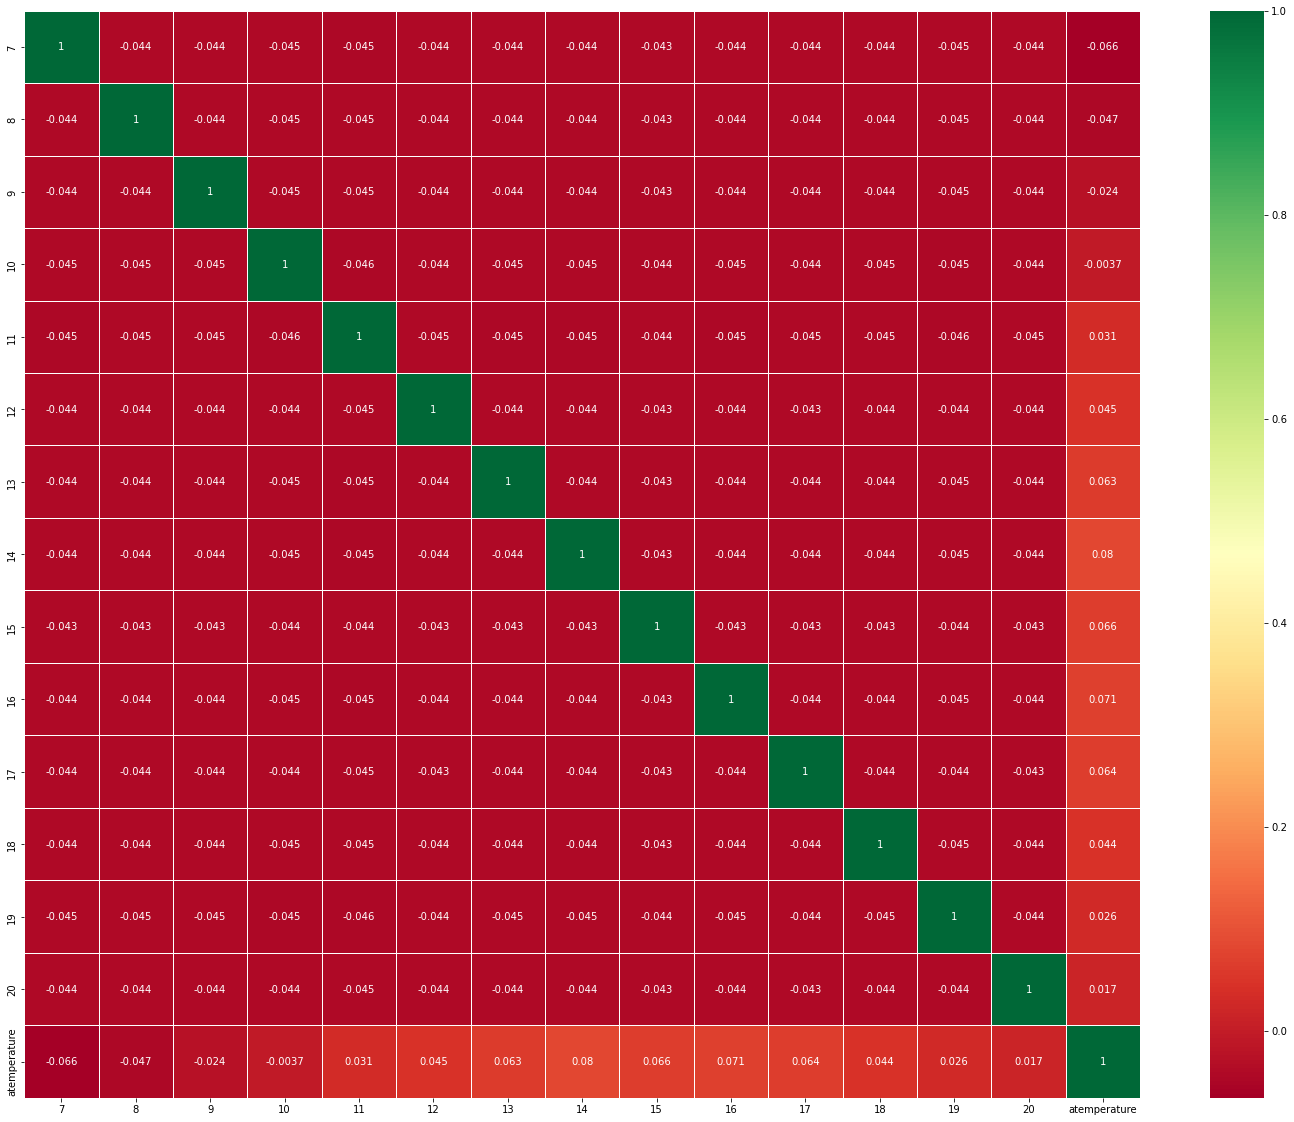

In [63]:
# heat map to check collinearity
plt.figure(figsize = (25,20))
ax= sns.heatmap(X_train_new.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [64]:
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     1006.
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:17:50   Log-Likelihood:                 8112.4
No. Observations:               12165   AIC:                        -1.619e+04
Df Residuals:                   12149   BIC:                        -1.607e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0883      0.003    -25.307   

c:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


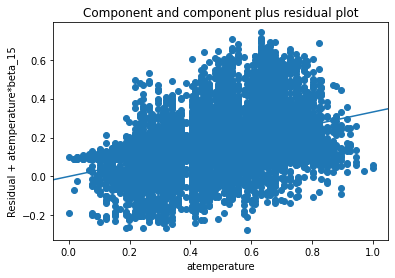

In [65]:
sm.graphics.plot_ccpr(lr1, 'atemperature')
plt.show()

In [72]:
lr1.params

const          -0.088288
7               0.162823
8               0.302670
9               0.154017
10              0.107274
11              0.130144
12              0.178427
13              0.169906
14              0.157688
15              0.164350
16              0.227666
17              0.378356
18              0.347372
19              0.240028
20              0.154648
atemperature    0.331419
dtype: float64

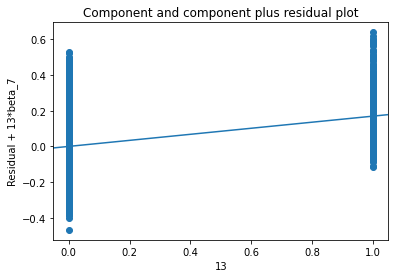

In [70]:
sm.graphics.plot_ccpr(lr1, 7)
plt.show()

C:\Users\ASUS\AppData\Local\Temp/ipykernel_15084/409508919.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_count), bins = 20)


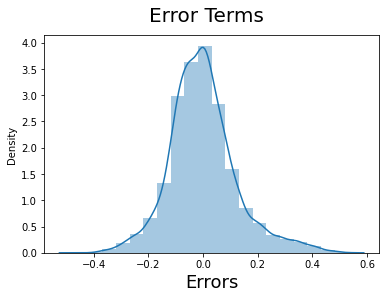

In [73]:
# Accuracy on train data
y_train_count = lr1.predict(X_train_lm1)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

